The purpose of the porject is to find what animal is most likely to be adopted. We will create seperate spreadsheets for dogs and cats and then analyze their sex, age, breed, and color.

In [22]:
import datetime as dt
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from matplotlib.patches import ConnectionPatch
import numpy as np
import pandas as pd 
import re

In [23]:
# Creating new column for age ranges
def get_age_group(age):
    if age < 90:
        return "0-3 months"
    elif age <=365:
        return "3-12 months"
    elif age <= 731:
        return "1-2 Years"
    elif age <= 1825:
        return "2-5 Years"
    else:
        return "5+ Years"

## Data Cleaning

In [24]:
# read in the dataset
df = pd.read_csv("train.csv", index_col = 0)

# remove unnecessary columns and rows
df.drop("Name", axis = 1, inplace=True)
df.drop("OutcomeSubtype", axis = 1, inplace=True)
df.drop(df[df.OutcomeType == "Died"].index, inplace=True)
df.drop(df[df.OutcomeType == "Return_to_owner"].index, inplace=True)

# add a column to show whether the animal was adopted
df["Adopted"] = df.apply(lambda row: row["OutcomeType"] == "Adoption", axis=1)

# change age to days, assume there are 365 days in a year and 30 days in a month.
df.rename({"AgeuponOutcome": "AgeuponOutcome(day)"}, axis=1, inplace=True)
for index, row in df.iterrows():
    try:
        num = int(re.compile(r"[0-9]+").match(row["AgeuponOutcome(day)"]).group(0))
       
        if "year" in row["AgeuponOutcome(day)"]:
            df.at[index,"AgeuponOutcome(day)"] = int(num * 365)
        elif "month" in row["AgeuponOutcome(day)"]:
            df.at[index,"AgeuponOutcome(day)"] = num * 30
        elif "week" in row["AgeuponOutcome(day)"]:
            df.at[index,"AgeuponOutcome(day)"] = num * 7
        elif "day" in row["AgeuponOutcome(day)"]:
            df.at[index,"AgeuponOutcome(day)"] = num
    except:
        continue
        # there are about 20 missing data

#Creat age bins
df['Age Group'] = df["AgeuponOutcome(day)"].apply(get_age_group)
df.head()
        

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome(day),Breed,Color,Adopted,Age Group
AnimalID,,,,,,,,,
A656520,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,False,3-12 months
A686464,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,True,1-2 Years
A683430,2014-07-11 19:09:00,Transfer,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,False,0-3 months
A667013,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,False,1-2 Years
A677334,2014-04-25 13:04:00,Transfer,Dog,Intact Female,30,Cairn Terrier/Chihuahua Shorthair,Black/Tan,False,0-3 months


In [25]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(df)

In [26]:
# create seperate dataframes for dogs and cats
grouped = df.groupby(df.AnimalType)
dogs = grouped.get_group("Dog")
cats = grouped.get_group("Cat")

In [27]:
dogs.head()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(cats)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome(day),Breed,Color,Adopted,Age Group
AnimalID,,,,,,,,,
A686464,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,730,Pit Bull Mix,Blue/White,True,1-2 Years
A667013,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,730,Lhasa Apso/Miniature Poodle,Tan,False,1-2 Years
A677334,2014-04-25 13:04:00,Transfer,Dog,Intact Female,30,Cairn Terrier/Chihuahua Shorthair,Black/Tan,False,0-3 months
A671784,2014-02-04 17:17:00,Adoption,Dog,Spayed Female,150,American Pit Bull Terrier Mix,Red/White,True,3-12 months
A677747,2014-05-03 07:48:00,Adoption,Dog,Spayed Female,365,Cairn Terrier,White,True,3-12 months


In [28]:
cats.head()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(dogs)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome(day),Breed,Color,Adopted,Age Group
AnimalID,,,,,,,,,
A656520,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,365,Domestic Shorthair Mix,Cream Tabby,False,3-12 months
A683430,2014-07-11 19:09:00,Transfer,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Cream,False,0-3 months
A699218,2015-03-28 13:11:00,Transfer,Cat,Intact Male,21,Domestic Shorthair Mix,Blue Tabby,False,0-3 months
A701489,2015-04-30 17:02:00,Transfer,Cat,Unknown,21,Domestic Shorthair Mix,Brown Tabby,False,0-3 months
A668402,2013-12-05 15:50:00,Transfer,Cat,Unknown,730,Domestic Shorthair Mix,Black,False,1-2 Years


## Data Visualization and Analysis

This bar chart shows the percepntage of dogs adopted for different groups of ages.

/var/folders/_2/zgpgfcvj3gjc4mwm7vvg_z3r0000gn/T/ipykernel_1480/2702375232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs['Age Group'] = dogs["AgeuponOutcome(day)"].apply(get_age_group)


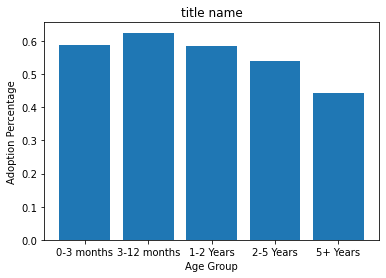

In [8]:
#Create bins for dogs 
dogs['Age Group'] = dogs["AgeuponOutcome(day)"].apply(get_age_group)

#This is out of order because value counts will go be highest number
age_groups = ["3-12 months",  "1-2 Years", "2-5 Years", "0-3 months",  "5+ Years"]
age_groups_in_order = ["0-3 months", "3-12 months",  "1-2 Years", "2-5 Years", "5+ Years"]
age_group_totals = dogs['Age Group'].value_counts().tolist()
percentages = [0] * 5

for i in range(5):
    adopted = len(dogs[(dogs['Adopted'] == True) & (dogs['Age Group'] == age_groups[i] )])
    percentages[i] = float(adopted / age_group_totals[i])


percentages_in_order = [percentages[3],percentages[0],percentages[1],percentages[2],percentages[4]]

plt.bar(age_groups_in_order, percentages_in_order)
plt.title('title name')
plt.xlabel('Age Group')
plt.ylabel('Adoption Percentage')
plt.show()

The two pie charts shows the percentage of dogs and cats adopted respectively.

We can see that 6497 dogs were adopted, and 4762 were not.
We can see that 4272 dogs were adopted, and 6215 were not.


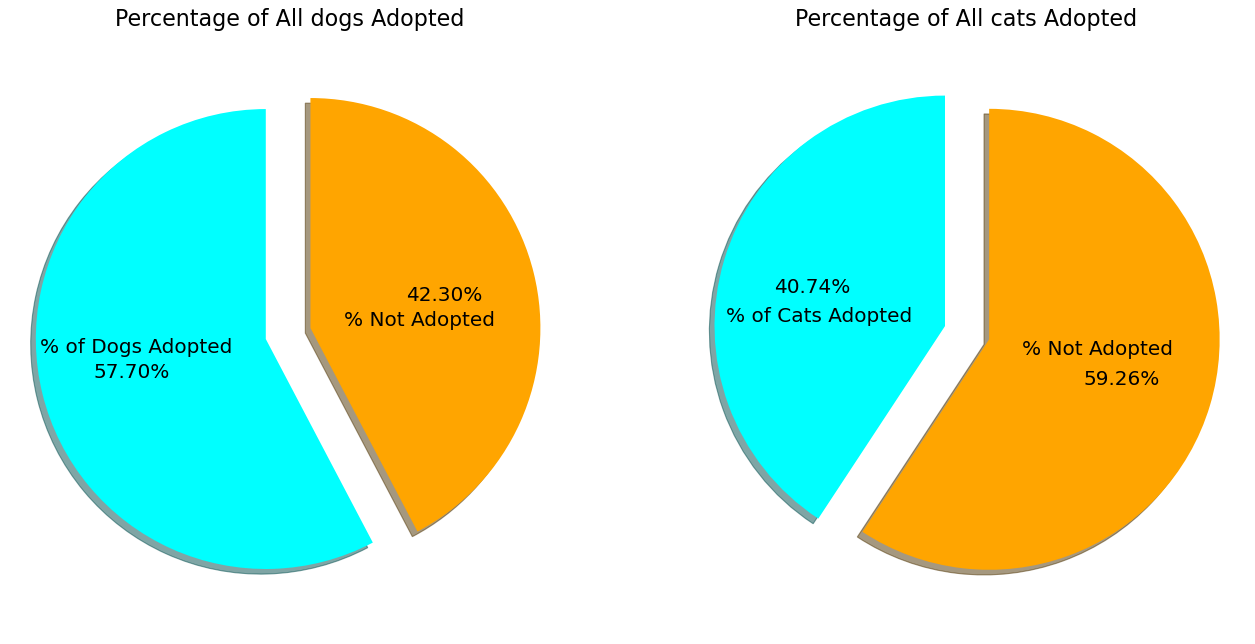

In [29]:
adopt_dog = dogs["Adopted"].value_counts()
print("We can see that", adopt_dog[True] , "dogs were adopted, and", 
      adopt_dog[False], "were not.")

adopt_cat = cats["Adopted"].value_counts()
print("We can see that", adopt_cat[True], "dogs were adopted, and", 
            adopt_cat[False], "were not.")

figure(figsize=(20, 10), dpi=80)
   
#Dogs vs Cats Pie Charts
    
# plot for dogs
labels= ['% of Dogs Adopted', '% Not Adopted']
colors=['cyan', 'orange']
sizes = [adopt_dog[True], adopt_dog[False]]
ax = plt.subplot(1,2,1)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%', 
        textprops={'fontsize': 18}, labeldistance= 0.15)
plt.title('Percentage of All dogs Adopted', fontsize = '20')
plt.axis('equal')

# plot for cats
labels= ['% of Cats Adopted', '% Not Adopted']
colors=['cyan', 'orange']
sizes = [adopt_cat[True], adopt_cat[False]]
ax = plt.subplot(1,2,2)
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%', 
        textprops={'fontsize': 18}, labeldistance= 0.15)
plt.title('Percentage of All cats Adopted', fontsize = '20')
plt.axis('equal')
    
plt.show()

In [ ]:
dogs.head()

## Deprecated 

In [ ]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [adopt_dog[True], adopt_dog[False]]
labels = ['% of Dogs Adopted', '% Not Adopted']
explode = [0.1, 0.1]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of dogs')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()